<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import  pprint
import  subprocess 
import sys 
sys.path.append('../')

import numpy as np
import scipy as sp
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns



from network import Protocol, Network, NetworkNMDA, NetworkManager
from patterns_representation import PatternsRepresentation
from analysis_functions import calculate_persistence_time, calculate_recall_quantities
from plotting_functions import plot_weight_matrix, plot_network_activity_angle, plot_persistent_matrix

%matplotlib inline

np.set_printoptions(suppress=True, precision=5)

sns.set(font_scale=3.5)
sns.set_style("whitegrid", {'axes.grid': False})
plt.rcParams['figure.figsize'] = (12, 8)
lw = 8
ms = 28
alpha_graph = 0.3
colors = sns.color_palette()

In [2]:
sys_number = 30
sigma_out_set = [0.05, 0.15]
tolerance = 0.8
tau_z_pre_set_sys = np.linspace(0.025, 0.140, num=sys_number)

nmda_data = np.load('../pawel_nmda.npy')
ampa_data = np.load('../pawel_nmda_only.npy')

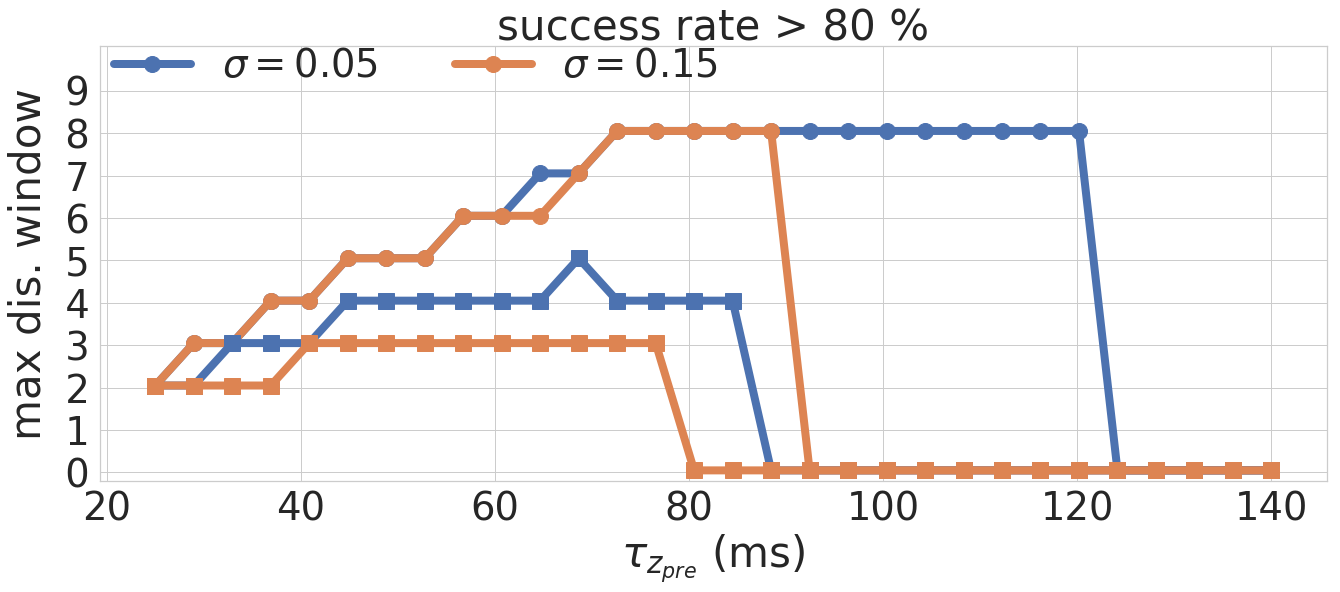

In [3]:

sns.set(font_scale=3.5)
sns.set_style("whitegrid", {'axes.grid': False})

fig = plt.figure(figsize=(22, 8))
ax = fig.add_subplot(111)
ms = 16

for index, max_seq in enumerate(nmda_data.T):
    label = r'$\sigma = $' + str(sigma_out_set[index])
    ax.plot(tau_z_pre_set_sys * 1000.0, max_seq, 'o-', color=colors[index], ms=ms, lw=lw, label=label)
for index, max_seq in enumerate(ampa_data.T):    
    ax.plot(tau_z_pre_set_sys * 1000, max_seq, 's-', color=colors[index], ms=ms, lw=lw)
    
ax.set_xlabel(r'$\tau_{z_{pre}}$ (ms)')
ax.set_ylabel('max dis. window')
ax.set_title(r'success rate > 80 %' )

# Modify y labels
ylabels_points  = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# ylabels_points  = [1, 2, 3, 4, 5, 6, 7, 8]
#ylabels_points  = [1, 3, 5, 7, 9]
ylocations = [y - 0.05 for y in ylabels_points]
ylabels_string = [f'{y:2.0f}' for y in ylabels_points] 
ax.yaxis.set_major_locator(plt.FixedLocator(ylocations))
ax.yaxis.set_major_formatter(plt.FixedFormatter(ylabels_string))
ax.set_ylim([-0.25, 10])
#ax.set_xlim([0, 170])

ax.grid()
    
ax.legend(frameon=False, loc=(-0.001, 0.875), ncol=3)

if True:
    directory = '../plot_producers/'
    file_name = 'pawel_japan' 
    format_string = '.svg'
    string_to_save = directory + file_name + format_string
    fig.savefig(string_to_save, frameon=False, dpi=110, bbox_inches='tight', transparent=True)